In [49]:
%pip install numpy -q
import numpy as np

# Garante que bibliotecas graficas estao instaladas
%pip install matplotlib==3.9.2 -q
%pip install networkx==3.2.1 -q

# Importa para utilizacao
import matplotlib.pyplot as plt
import networkx as nx

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:

L3 = []
L3.extend(['ABCDEFBCDEFBDCEG' for _ in range(1)])
L3.extend(['ABDCEG' for _ in range(2)])
L3.extend(['ABCDEFBCDEFBDCEG' for _ in range(1)])

L4 = []
L4.extend(['ACD' for _ in range(45)])
L4.extend(['BCD' for _ in range(42)])
L4.extend(['ACE' for _ in range(38)])
L4.extend(['BCE' for _ in range(22)])

L5 = []
L5.extend(['ABEF' for _ in range(2)])
L5.extend(['ABECDBF' for _ in range(3)])
L5.extend(['ABCEDBF' for _ in range(2)])
L5.extend(['ABCDEBF' for _ in range(4)])
L5.extend(['AEBCDBF' for _ in range(3)])

print(L3)
print(L4)
print(L5)

['ABCDEFBCDEFBDCEG', 'ABDCEG', 'ABDCEG', 'ABCDEFBCDEFBDCEG']
['ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'ACD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'BCD', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'ACE', 'BCE', 'BCE', 'BCE', 'BCE', 'BCE', 'BCE', 'BCE', 'BCE', 'BCE', 

In [58]:
L = []
L.extend(['AE' for _ in range(5)])
L.extend(['ABCE' for _ in range(10)])
L.extend(['ACBE' for _ in range(10)])
L.extend(['ABE' for _ in range(1)])
L.extend(['ACE' for _ in range(1)])
L.extend(['ADE' for _ in range(10)])
L.extend(['ADDE' for _ in range(2)])
L.extend(['ADDDE' for _ in range(1)])

In [64]:
L = []
L.extend(['AE' for _ in range(5)])
L.extend(['ABCE' for _ in range(10)])
L.extend(['ACBE' for _ in range(10)])
L.extend(['ABE' for _ in range(1)])
L.extend(['ACE' for _ in range(1)])
L.extend(['ADE' for _ in range(10)])
L.extend(['ADDE' for _ in range(2)])
L.extend(['ADDDE' for _ in range(1)])

log = L

noise_amount = 1

def get_extremes(log: list[str], orient: int = 1) -> list[str]:
    extremes = []
    for trace in log:
        if orient >= 0:
            if not trace[0] in extremes:
                extremes.append(trace[0])
        else:
            if not trace[-1] in extremes:
                extremes.append(trace[-1])
    return extremes

def get_paths(log: list[str]) -> dict[tuple[str, str], int]:
    paths = {}
    for trace in log:
        for i in range(len(trace)):
            if (i + 1 < len(trace)):
                path = (trace[i], trace[i + 1]) #trace[i:(i + 2)]
                if not paths.get(path):
                    paths[path] = 0
                paths[path] += 1
    return paths

def combine_paths_by_orient(paths: dict[tuple[str, str], int], orient: int, noise_amount: int = 0) -> dict[tuple[str, str], int]:
    unique_paths = {}
    for i, amt in paths.items():
        if amt > noise_amount:
            path = i
            keep = True
            for j in paths.keys():
                if i != j:
                    # Frontward
                    if j[0] in i[0] and orient >= 0:
                        keep = False
                        destination = path[1] + j[1]
                        path = (path[0], ''.join(sorted(destination)))
                        if not unique_paths.get(path):
                            unique_paths[path] = amt
                        unique_paths[path] += paths[j]
                    # Backward
                    if j[1] in i[1] and orient < 0:
                        keep = False
                        origin = path[0] + j[0]
                        path = (''.join(sorted(origin)), path[1])
                        if not unique_paths.get(path):
                            unique_paths[path] = amt
                        unique_paths[path] += paths[j]
            if keep:
                unique_paths[path] = amt
    return unique_paths

inputs = get_extremes(log, orient=1)
outputs = get_extremes(log, orient=-1)
paths = get_paths(log)

paths_comb = paths.copy()

same_origin = combine_paths_by_orient(paths_comb, orient=1, noise_amount=1)
same_destination = combine_paths_by_orient(paths_comb, orient=-1, noise_amount=1)
same_both = combine_paths_by_orient(same_origin, orient=-1, noise_amount=1)

paths_comb.update(same_origin)
paths_comb.update(same_destination)
paths_comb.update(same_both)

print(inputs)
print(paths_comb)
print(outputs)



['A']
{('A', 'E'): 5, ('A', 'B'): 11, ('B', 'C'): 10, ('C', 'E'): 11, ('A', 'C'): 11, ('C', 'B'): 10, ('B', 'E'): 11, ('A', 'D'): 13, ('D', 'E'): 13, ('D', 'D'): 4}
['E']


In [65]:
class HeuristicMiner:
    def __init__(self, log):
        self.log = log  # List of traces
        self.event_pairs = {}  # Store direct succession counts
        self.dependency_matrix = {}  # Store dependency values
        self.successors = {}  # Store successors of each event
        self.predecessors = {}  # Store predecessors of each event
        self.threshold = 0.5  # Threshold for dependency strength

    def parse_log(self):
        """
        Parse the input log to count direct succession between events and find successors and predecessors.
        """
        for trace in self.log:
            events = list(trace)
            for i in range(len(events) - 1):
                pair = (events[i], events[i + 1])
                
                # Count direct succession a -> b
                if pair not in self.event_pairs:
                    self.event_pairs[pair] = 0
                self.event_pairs[pair] += 1
                
                # Record successors
                if events[i] not in self.successors:
                    self.successors[events[i]] = set()
                self.successors[events[i]].add(events[i + 1])
                
                # Record predecessors
                if events[i + 1] not in self.predecessors:
                    self.predecessors[events[i + 1]] = set()
                self.predecessors[events[i + 1]].add(events[i])
                
                # Count reverse succession b -> a
                reverse_pair = (events[i + 1], events[i])
                if reverse_pair not in self.event_pairs:
                    self.event_pairs[reverse_pair] = 0

    def calculate_dependency(self):
        """
        Calculate the dependency measure for each event pair.
        """
        for (a, b) in self.event_pairs:
            ab = self.event_pairs.get((a, b), 0)  # a -> b
            ba = self.event_pairs.get((b, a), 0)  # b -> a

            # Dependency formula: D(a, b)
            dependency_value = (ab - ba) / (ab + ba + 1)
            self.dependency_matrix[(a, b)] = dependency_value

    def classify_splits(self, event):
        """
        Classify the splits (AND/XOR) based on the event's successors.
        """
        successors = self.successors.get(event, [])
        if len(successors) < 2:
            return None  # No split
        
        # Check dependency measures for each successor
        dependencies = [self.dependency_matrix.get((event, succ), 0) for succ in successors]
        
        # XOR-split if one successor has a significantly higher dependency than the others
        if max(dependencies) > 0.9:
            return "XOR-split"
        else:
            return "AND-split"

    def classify_joins(self, event):
        """
        Classify the joins (AND/XOR) based on the event's predecessors.
        """
        predecessors = self.predecessors.get(event, [])
        if len(predecessors) < 2:
            return None  # No join
        
        # Check dependency measures for each predecessor
        dependencies = [self.dependency_matrix.get((pred, event), 0) for pred in predecessors]
        
        # XOR-join if one predecessor has a significantly higher dependency than the others
        if max(dependencies) > 0.9:
            return "XOR-join"
        else:
            return "AND-join"

    def build_causal_graph(self):
        """
        Build the causal graph based on the dependency matrix and classify splits/joins.
        """
        causal_relations = []
        splits = {}
        joins = {}

        for (a, b), dependency in self.dependency_matrix.items():
            if dependency > self.threshold:
                causal_relations.append((a, b))
        
        # Classify splits and joins for each event
        for event in self.successors:
            split_type = self.classify_splits(event)
            if split_type:
                splits[event] = split_type

        for event in self.predecessors:
            join_type = self.classify_joins(event)
            if join_type:
                joins[event] = join_type

        return causal_relations, splits, joins

    def run(self):
        """
        Execute the Heuristic Miner.
        """
        self.parse_log()
        self.calculate_dependency()
        causal_graph, splits, joins = self.build_causal_graph()

        # Output the causal relations, splits, and joins
        return causal_graph, splits, joins


# Example usage:
hm = HeuristicMiner(log)
causal_graph, splits, joins = hm.run()

# Print the causal relations
print("Causal Relations:")
for relation in causal_graph:
    print(f"{relation[0]} -> {relation[1]}")

# Print the splits
print("\nSplits:")
for event, split_type in splits.items():
    print(f"{event}: {split_type}")

# Print the joins
print("\nJoins:")
for event, join_type in joins.items():
    print(f"{event}: {join_type}")


Causal Relations:
A -> E
A -> B
C -> E
A -> C
B -> E
A -> D
D -> E

Splits:
A: XOR-split
B: XOR-split
C: XOR-split
D: XOR-split

Joins:
E: XOR-join
B: XOR-join
C: XOR-join
D: XOR-join


Causal Relations:
A -> E
A -> B
C -> E
A -> C
B -> E
A -> D
D -> E

Splits:
A: XOR-split
B: XOR-split
C: XOR-split
D: XOR-split

Joins:
E: XOR-join
B: XOR-join
C: XOR-join
D: XOR-join


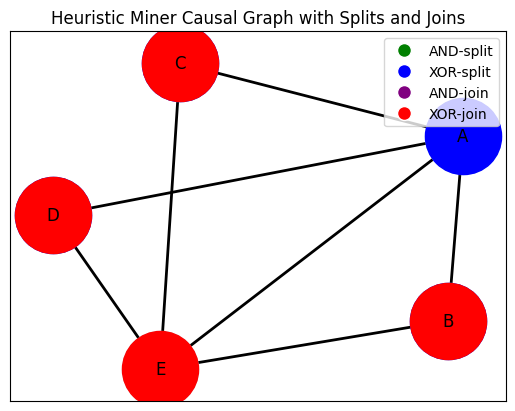

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

class HeuristicMiner:
    def __init__(self, log):
        self.log = log  # List of traces
        self.event_pairs = {}  # Store direct succession counts
        self.dependency_matrix = {}  # Store dependency values
        self.successors = {}  # Store successors of each event
        self.predecessors = {}  # Store predecessors of each event
        self.threshold = 0.5  # Threshold for dependency strength

    def parse_log(self):
        """
        Parse the input log to count direct succession between events and find successors and predecessors.
        """
        for trace in self.log:
            events = list(trace)
            for i in range(len(events) - 1):
                pair = (events[i], events[i + 1])
                
                # Count direct succession a -> b
                if pair not in self.event_pairs:
                    self.event_pairs[pair] = 0
                self.event_pairs[pair] += 1
                
                # Record successors
                if events[i] not in self.successors:
                    self.successors[events[i]] = set()
                self.successors[events[i]].add(events[i + 1])
                
                # Record predecessors
                if events[i + 1] not in self.predecessors:
                    self.predecessors[events[i + 1]] = set()
                self.predecessors[events[i + 1]].add(events[i])
                
                # Count reverse succession b -> a
                reverse_pair = (events[i + 1], events[i])
                if reverse_pair not in self.event_pairs:
                    self.event_pairs[reverse_pair] = 0

    def calculate_dependency(self):
        """
        Calculate the dependency measure for each event pair.
        """
        for (a, b) in self.event_pairs:
            ab = self.event_pairs.get((a, b), 0)  # a -> b
            ba = self.event_pairs.get((b, a), 0)  # b -> a

            # Dependency formula: D(a, b)
            dependency_value = (ab - ba) / (ab + ba + 1)
            self.dependency_matrix[(a, b)] = dependency_value

    def classify_splits(self, event):
        """
        Classify the splits (AND/XOR) based on the event's successors.
        """
        successors = self.successors.get(event, [])
        if len(successors) < 2:
            return None  # No split
        
        # Check dependency measures for each successor
        dependencies = [self.dependency_matrix.get((event, succ), 0) for succ in successors]
        
        # XOR-split if one successor has a significantly higher dependency than the others
        if max(dependencies) > 0.9:
            return "XOR-split"
        else:
            return "AND-split"

    def classify_joins(self, event):
        """
        Classify the joins (AND/XOR) based on the event's predecessors.
        """
        predecessors = self.predecessors.get(event, [])
        if len(predecessors) < 2:
            return None  # No join
        
        # Check dependency measures for each predecessor
        dependencies = [self.dependency_matrix.get((pred, event), 0) for pred in predecessors]
        
        # XOR-join if one predecessor has a significantly higher dependency than the others
        if max(dependencies) > 0.9:
            return "XOR-join"
        else:
            return "AND-join"

    def build_causal_graph(self):
        """
        Build the causal graph based on the dependency matrix and classify splits/joins.
        """
        causal_relations = []
        splits = {}
        joins = {}

        for (a, b), dependency in self.dependency_matrix.items():
            if dependency > self.threshold:
                causal_relations.append((a, b))
        
        # Classify splits and joins for each event
        for event in self.successors:
            split_type = self.classify_splits(event)
            if split_type:
                splits[event] = split_type

        for event in self.predecessors:
            join_type = self.classify_joins(event)
            if join_type:
                joins[event] = join_type

        return causal_relations, splits, joins

    def run(self):
        """
        Execute the Heuristic Miner.
        """
        self.parse_log()
        self.calculate_dependency()
        causal_graph, splits, joins = self.build_causal_graph()

        # Output the causal relations, splits, and joins
        return causal_graph, splits, joins

    def visualize_graph(self, causal_graph, splits, joins):
        """
        Visualize the causal graph using NetworkX and Matplotlib.
        """
        G = nx.DiGraph()

        # Add causal relations to the graph
        for (a, b) in causal_graph:
            G.add_edge(a, b)

        pos = nx.spring_layout(G, k=5)

        # Draw the nodes and edges
        nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='black', width=2)
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000, alpha=0.8)
        nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

        # Highlight splits and joins
        split_colors = {'AND-split': 'green', 'XOR-split': 'blue'}
        join_colors = {'AND-join': 'purple', 'XOR-join': 'red'}
        
        # Draw splits
        for event, split_type in splits.items():
            nx.draw_networkx_nodes(G, pos, nodelist=[event], node_color=split_colors[split_type], node_size=3000)
        
        # Draw joins
        for event, join_type in joins.items():
            nx.draw_networkx_nodes(G, pos, nodelist=[event], node_color=join_colors[join_type], node_size=3000)

        # Add legend for splits and joins
        split_patch = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=stype)
                       for stype, color in split_colors.items()]
        join_patch = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=jtype)
                      for jtype, color in join_colors.items()]

        plt.legend(handles=split_patch + join_patch, loc='upper right')

        plt.title("Heuristic Miner Causal Graph with Splits and Joins")
        plt.show()


# Example usage:
hm = HeuristicMiner(log)
causal_graph, splits, joins = hm.run()

# Print the causal relations
print("Causal Relations:")
for relation in causal_graph:
    print(f"{relation[0]} -> {relation[1]}")

# Print the splits
print("\nSplits:")
for event, split_type in splits.items():
    print(f"{event}: {split_type}")

# Print the joins
print("\nJoins:")
for event, join_type in joins.items():
    print(f"{event}: {join_type}")

# Visualize the graph
hm.visualize_graph(causal_graph, splits, joins)


In [71]:
class HeuristicMiner:
    def __init__(self, log):
        self.log = log  # List of traces
        self.event_pairs = {}  # Store direct succession counts
        self.dependency_matrix = {}  # Store dependency values
        self.successors = {}  # Store successors of each event
        self.predecessors = {}  # Store predecessors of each event
        self.recursions = {}  # Store detected recursions
        self.threshold = 0.5  # Threshold for dependency strength

    def parse_log(self):
        """
        Parse the input log to count direct succession between events and find successors and predecessors.
        Also checks for direct recursions.
        """
        for trace in self.log:
            events = list(trace)
            for i in range(len(events) - 1):
                pair = (events[i], events[i + 1])
                
                # Count direct succession a -> b
                if pair not in self.event_pairs:
                    self.event_pairs[pair] = 0
                self.event_pairs[pair] += 1
                
                # Record successors
                if events[i] not in self.successors:
                    self.successors[events[i]] = set()
                self.successors[events[i]].add(events[i + 1])
                
                # Record predecessors
                if events[i + 1] not in self.predecessors:
                    self.predecessors[events[i + 1]] = set()
                self.predecessors[events[i + 1]].add(events[i])
                
                # Detect direct recursion (D -> D)
                if events[i] == events[i + 1]:
                    if events[i] not in self.recursions:
                        self.recursions[events[i]] = 0
                    self.recursions[events[i]] += 1

    def calculate_dependency(self):
        """
        Calculate the dependency measure for each event pair.
        """
        for (a, b) in self.event_pairs:
            ab = self.event_pairs.get((a, b), 0)  # a -> b
            ba = self.event_pairs.get((b, a), 0)  # b -> a

            # Dependency formula: D(a, b)
            dependency_value = (ab - ba) / (ab + ba + 1)
            self.dependency_matrix[(a, b)] = dependency_value

    def detect_recursion(self):
        """
        Detect recursion patterns (indirect or cyclic) in the traces.
        """
        for event, successors in self.successors.items():
            if event in successors:
                # Direct recursion: event followed by itself
                if event not in self.recursions:
                    self.recursions[event] = 0
                self.recursions[event] += 1

    def classify_splits(self, event):
        """
        Classify the splits (AND/XOR) based on the event's successors.
        """
        successors = self.successors.get(event, [])
        if len(successors) < 2:
            return None  # No split
        
        # Check dependency measures for each successor
        dependencies = [self.dependency_matrix.get((event, succ), 0) for succ in successors]
        
        # XOR-split if one successor has a significantly higher dependency than the others
        if max(dependencies) > 0.9:
            return "XOR-split"
        else:
            return "AND-split"

    def classify_joins(self, event):
        """
        Classify the joins (AND/XOR) based on the event's predecessors.
        """
        predecessors = self.predecessors.get(event, [])
        if len(predecessors) < 2:
            return None  # No join
        
        # Check dependency measures for each predecessor
        dependencies = [self.dependency_matrix.get((pred, event), 0) for pred in predecessors]
        
        # XOR-join if one predecessor has a significantly higher dependency than the others
        if max(dependencies) > 0.9:
            return "XOR-join"
        else:
            return "AND-join"

    def build_causal_graph(self):
        """
        Build the causal graph based on the dependency matrix and classify splits/joins.
        """
        causal_relations = []
        splits = {}
        joins = {}

        for (a, b), dependency in self.dependency_matrix.items():
            if dependency > self.threshold:
                causal_relations.append((a, b))
        
        # Classify splits and joins for each event
        for event in self.successors:
            split_type = self.classify_splits(event)
            if split_type:
                splits[event] = split_type

        for event in self.predecessors:
            join_type = self.classify_joins(event)
            if join_type:
                joins[event] = join_type

        return causal_relations, splits, joins, self.recursions

    def run(self):
        """
        Execute the Heuristic Miner.
        """
        self.parse_log()
        self.calculate_dependency()
        self.detect_recursion()  # Detect recursion after dependency analysis
        causal_graph, splits, joins, recursions = self.build_causal_graph()

        # Output the causal relations, splits, joins, and recursion info
        return causal_graph, splits, joins, recursions


# Example usage with the provided log:
L = []
L.extend(['AE' for _ in range(5)])
L.extend(['ABCE' for _ in range(10)])
L.extend(['ACBE' for _ in range(10)])
L.extend(['ABE' for _ in range(1)])
L.extend(['ACE' for _ in range(1)])
L.extend(['ADE' for _ in range(10)])
L.extend(['ADDE' for _ in range(2)])
L.extend(['ADDDE' for _ in range(1)])

hm = HeuristicMiner(L)
causal_graph, splits, joins, recursions = hm.run()

# Print the causal relations
print("Causal Relations:")
for relation in causal_graph:
    print(f"{relation[0]} -> {relation[1]}")

# Print the splits
print("\nSplits:")
for event, split_type in splits.items():
    print(f"{event}: {split_type}")

# Print the joins
print("\nJoins:")
for event, join_type in joins.items():
    print(f"{event}: {join_type}")

# Print recursion information
print("\nRecursions:")
for event, count in recursions.items():
    print(f"Event {event} recursed {count} times.")


Causal Relations:
A -> E
A -> B
C -> E
A -> C
B -> E
A -> D
D -> E

Splits:
A: XOR-split
B: XOR-split
C: XOR-split
D: XOR-split

Joins:
E: XOR-join
B: XOR-join
C: XOR-join
D: XOR-join

Recursions:
Event D recursed 5 times.


In [74]:
class HeuristicMiner:
    def __init__(self, log):
        self.log = log  # List of traces
        self.event_pairs = {}  # Store direct succession counts
        self.dependency_matrix = {}  # Store dependency values
        self.successors = {}  # Store successors of each event
        self.predecessors = {}  # Store predecessors of each event
        self.recursions = {}  # Store detected recursions
        self.threshold = 0.5  # Threshold for dependency strength

    def parse_log(self):
        """
        Parse the input log to count direct succession between events and find successors and predecessors.
        Also checks for direct recursions.
        """
        for trace in self.log:
            events = list(trace)
            for i in range(len(events) - 1):
                pair = (events[i], events[i + 1])
                
                # Count direct succession a -> b
                if pair not in self.event_pairs:
                    self.event_pairs[pair] = 0
                self.event_pairs[pair] += 1
                
                # Record successors
                if events[i] not in self.successors:
                    self.successors[events[i]] = set()
                self.successors[events[i]].add(events[i + 1])
                
                # Record predecessors
                if events[i + 1] not in self.predecessors:
                    self.predecessors[events[i + 1]] = set()
                self.predecessors[events[i + 1]].add(events[i])
                
                # Detect direct recursion (D -> D)
                if events[i] == events[i + 1]:
                    if events[i] not in self.recursions:
                        self.recursions[events[i]] = 0
                    self.recursions[events[i]] += 1

    def calculate_dependency(self):
        """
        Calculate the dependency measure for each event pair.
        """
        for (a, b) in self.event_pairs:
            ab = self.event_pairs.get((a, b), 0)  # a -> b
            ba = self.event_pairs.get((b, a), 0)  # b -> a

            # Dependency formula: D(a, b)
            dependency_value = (ab - ba) / (ab + ba + 1)
            self.dependency_matrix[(a, b)] = dependency_value

    def detect_recursion(self):
        """
        Detect recursion patterns (indirect or cyclic) in the traces.
        """
        for event, successors in self.successors.items():
            if event in successors:
                # Direct recursion: event followed by itself
                if event not in self.recursions:
                    self.recursions[event] = 0
                self.recursions[event] += 1

    def classify_splits(self, event):
        """
        Classify the splits (AND/XOR) based on the event's successors.
        Return a tuple (origin, destinations) for the split.
        """
        successors = self.successors.get(event, [])
        if len(successors) < 2:
            return None  # No split
        
        # Check dependency measures for each successor
        dependencies = [self.dependency_matrix.get((event, succ), 0) for succ in successors]
        
        # AND-split if all successors have strong dependency on the event
        if all(dep > self.threshold for dep in dependencies):
            return (event, tuple(successors))  # AND-split tuple
        
        # XOR-split if one successor has a significantly higher dependency than the others
        if max(dependencies) > 0.9:
            return (event, (max(successors, key=lambda succ: self.dependency_matrix.get((event, succ), 0)),))  # XOR-split
        else:
            return (event, tuple(successors))  # Default to AND-split

    def classify_joins(self, event):
        """
        Classify the joins (AND/XOR) based on the event's predecessors.
        Return a tuple (sources, destination) for the join.
        """
        predecessors = self.predecessors.get(event, [])
        if len(predecessors) < 2:
            return None  # No join
        
        # Check dependency measures for each predecessor
        dependencies = [self.dependency_matrix.get((pred, event), 0) for pred in predecessors]
        
        # AND-join if all predecessors have strong dependency on the event
        if all(dep > self.threshold for dep in dependencies):
            return (tuple(predecessors), event)  # AND-join tuple
        
        # XOR-join if one predecessor has a significantly higher dependency than the others
        if max(dependencies) > 0.9:
            return ((max(predecessors, key=lambda pred: self.dependency_matrix.get((pred, event), 0)),), event)  # XOR-join
        else:
            return (tuple(predecessors), event)  # Default to AND-join

    def build_causal_graph(self):
        """
        Build the causal graph based on the dependency matrix and classify splits/joins.
        """
        causal_relations = []
        splits = {}
        joins = {}

        for (a, b), dependency in self.dependency_matrix.items():
            if dependency > self.threshold:
                causal_relations.append((a, b))
        
        # Classify splits and joins for each event
        for event in self.successors:
            split_type = self.classify_splits(event)
            if split_type:
                splits[event] = split_type

        for event in self.predecessors:
            join_type = self.classify_joins(event)
            if join_type:
                joins[event] = join_type

        return causal_relations, splits, joins, self.recursions

    def run(self):
        """
        Execute the Heuristic Miner.
        """
        self.parse_log()
        self.calculate_dependency()
        self.detect_recursion()  # Detect recursion after dependency analysis
        causal_graph, splits, joins, recursions = self.build_causal_graph()

        # Output the causal relations, splits, joins, and recursion info
        return causal_graph, splits, joins, recursions


# Example usage with the provided log:
L = []
L.extend(['AE' for _ in range(5)])
L.extend(['ABCE' for _ in range(10)])
L.extend(['ACBE' for _ in range(10)])
L.extend(['ABE' for _ in range(1)])
L.extend(['ACE' for _ in range(1)])
L.extend(['ADE' for _ in range(10)])
L.extend(['ADDE' for _ in range(2)])
L.extend(['ADDDE' for _ in range(1)])

hm = HeuristicMiner(L)
causal_graph, splits, joins, recursions = hm.run()

# Print the causal relations
print("Causal Relations:")
for relation in causal_graph:
    print(f"{relation[0]} -> {relation[1]}")

# Print the splits
print("\nSplits:")
for event, split_tuple in splits.items():
    print(f"{split_tuple[0]} -> {split_tuple[1]} (AND-split)")

# Print the joins
print("\nJoins:")
for event, join_tuple in joins.items():
    print(f"{join_tuple[0]} -> {join_tuple[1]} (AND-join)")

# Print recursion information
print("\nRecursions:")
for event, count in recursions.items():
    print(f"Event {event} recursed {count} times.")


Causal Relations:
A -> E
A -> B
C -> E
A -> C
B -> E
A -> D
D -> E

Splits:
A -> ('D', 'E', 'C', 'B') (AND-split)
B -> ('E',) (AND-split)
C -> ('E',) (AND-split)
D -> ('E',) (AND-split)

Joins:
('D', 'C', 'A', 'B') -> E (AND-join)
('A',) -> B (AND-join)
('A',) -> C (AND-join)
('A',) -> D (AND-join)

Recursions:
Event D recursed 5 times.


In [75]:
class HeuristicMiner:
    def __init__(self, log):
        self.log = log  # List of traces
        self.event_pairs = {}  # Store direct succession counts
        self.dependency_matrix = {}  # Store dependency values
        self.successors = {}  # Store successors of each event
        self.predecessors = {}  # Store predecessors of each event
        self.recursions = {}  # Store detected recursions
        self.threshold = 0.5  # Threshold for dependency strength

    def parse_log(self):
        """
        Parse the input log to count direct succession between events and find successors and predecessors.
        Also checks for direct recursions.
        """
        for trace in self.log:
            events = list(trace)
            for i in range(len(events) - 1):
                a = events[i]
                b = events[i + 1]
                pair = (a, b)

                # Count direct succession a -> b
                self.event_pairs[pair] = self.event_pairs.get(pair, 0) + 1

                # Record successors
                if a not in self.successors:
                    self.successors[a] = set()
                self.successors[a].add(b)

                # Record predecessors
                if b not in self.predecessors:
                    self.predecessors[b] = set()
                self.predecessors[b].add(a)

                # Detect direct recursion (D -> D)
                if a == b:
                    self.recursions[a] = self.recursions.get(a, 0) + 1

    def calculate_dependency(self):
        """
        Calculate the dependency measure for each event pair.
        """
        for (a, b) in self.event_pairs:
            ab = self.event_pairs.get((a, b), 0)  # a -> b
            ba = self.event_pairs.get((b, a), 0)  # b -> a

            # Dependency formula: D(a, b)
            dependency_value = (ab - ba) / (ab + ba + 1)
            self.dependency_matrix[(a, b)] = dependency_value

    def classify_splits(self, event):
        """
        Classify the splits (AND/OR) based on the event's successors using replay analysis.
        """
        successors = list(self.successors.get(event, []))
        if len(successors) < 2:
            return None  # No split

        # Replay log to determine if successors always occur together (AND) or sometimes independently (OR)
        and_split = True
        or_split = False

        for trace in self.log:
            events = set(trace)
            if event in events:
                event_index = trace.index(event)
                next_events_in_trace = set(trace[event_index + 1:])

                successors_in_trace = [s for s in successors if s in next_events_in_trace]
                
                if len(successors_in_trace) < len(successors):
                    and_split = False  # Not all successors appear together in this trace
                if len(successors_in_trace) > 0 and len(successors_in_trace) < len(successors):
                    or_split = True  # At least one successor occurs, but not all

        if and_split:
            return ('AND-split', event, tuple(successors))
        if or_split:
            return ('OR-split', event, tuple(successors))

        return None

    def classify_joins(self, event):
        """
        Classify the joins (AND/OR) based on the event's predecessors using replay analysis.
        """
        predecessors = list(self.predecessors.get(event, []))
        if len(predecessors) < 2:
            return None  # No join

        # Replay log to determine if predecessors always occur together (AND) or sometimes independently (OR)
        and_join = True
        or_join = False

        for trace in self.log:
            events = set(trace)
            if event in events:
                event_index = trace.index(event)
                prev_events_in_trace = set(trace[:event_index])

                predecessors_in_trace = [p for p in predecessors if p in prev_events_in_trace]

                if len(predecessors_in_trace) < len(predecessors):
                    and_join = False  # Not all predecessors appear together in this trace
                if len(predecessors_in_trace) > 0 and len(predecessors_in_trace) < len(predecessors):
                    or_join = True  # At least one predecessor occurs, but not all

        if and_join:
            return ('AND-join', tuple(predecessors), event)
        if or_join:
            return ('OR-join', tuple(predecessors), event)

        return None

    def build_causal_graph(self):
        """
        Build the causal graph based on the dependency matrix and classify splits/joins.
        """
        causal_relations = []
        splits = []
        joins = []

        # Build causal relations
        for (a, b), dependency in self.dependency_matrix.items():
            if dependency > self.threshold:
                causal_relations.append((a, b))

        # Classify splits
        for event in self.successors:
            split_info = self.classify_splits(event)
            if split_info:
                splits.append(split_info)

        # Classify joins
        for event in self.predecessors:
            join_info = self.classify_joins(event)
            if join_info:
                joins.append(join_info)

        return causal_relations, splits, joins, self.recursions

    def run(self):
        """
        Execute the Heuristic Miner.
        """
        self.parse_log()
        self.calculate_dependency()
        causal_graph, splits, joins, recursions = self.build_causal_graph()

        # Output the causal relations, splits, joins, and recursion info
        return causal_graph, splits, joins, recursions


# Example usage with the provided log:
L = []
L.extend(['AE' for _ in range(5)])
L.extend(['ABCE' for _ in range(10)])
L.extend(['ACBE' for _ in range(10)])
L.extend(['ABE' for _ in range(1)])
L.extend(['ACE' for _ in range(1)])
L.extend(['ADE' for _ in range(10)])
L.extend(['ADDE' for _ in range(2)])
L.extend(['ADDDE' for _ in range(1)])

hm = HeuristicMiner(L)
causal_graph, splits, joins, recursions = hm.run()

# Print the causal relations
print("Causal Relations:")
for relation in causal_graph:
    print(f"{relation[0]} -> {relation[1]}")

# Print the splits
print("\nSplits:")
for split in splits:
    split_type, origin, destinations = split
    print(f"{split_type}: {origin} -> {destinations}")

# Print the joins
print("\nJoins:")
for join in joins:
    join_type, sources, destination = join
    print(f"{join_type}: {sources} -> {destination}")

# Print recursion information
print("\nRecursions:")
for event, count in recursions.items():
    print(f"Event {event} recursed {count} times.")


Causal Relations:
A -> E
A -> B
C -> E
A -> C
B -> E
A -> D
D -> E

Splits:
OR-split: A -> ('D', 'E', 'C', 'B')
OR-split: B -> ('E', 'C')
OR-split: C -> ('E', 'B')
OR-split: D -> ('E', 'D')

Joins:
OR-join: ('D', 'C', 'A', 'B') -> E
OR-join: ('C', 'A') -> B
OR-join: ('A', 'B') -> C
OR-join: ('A', 'D') -> D

Recursions:
Event D recursed 4 times.


In [76]:
import itertools
from collections import defaultdict

# Step 1: Receive a list of traces in the format of strings
def build_causal_net(traces, threshold=0.5):
    event_pairs = defaultdict(int)
    dependency_matrix = defaultdict(lambda: defaultdict(float))
    event_count = defaultdict(int)

    # Step 2: Build a causal net for all direct relationships of the events
    for trace in traces:
        trace_events = list(trace)
        for i in range(len(trace_events) - 1):
            a = trace_events[i]
            b = trace_events[i + 1]
            event_pairs[(a, b)] += 1
            event_count[a] += 1
            event_count[b] += 1

    # Step 3: Calculate the Dependency Value from A -> B for all events
    for (a, b), count in event_pairs.items():
        freq_a_b = count
        freq_b_a = event_pairs[(b, a)]
        dependency_matrix[a][b] = (freq_a_b - freq_b_a) / (freq_a_b + freq_b_a + 1e-6)

    # Step 4: Filter the dependency matrix based on the threshold
    filtered_dependency = defaultdict(list)
    for a, deps in dependency_matrix.items():
        for b, dep_val in deps.items():
            if dep_val > threshold:
                filtered_dependency[a].append(b)

    # Step 5: Mount a causal net
    causal_net = defaultdict(int)
    for a, successors in filtered_dependency.items():
        for b in successors:
            causal_net[(a, b)] += event_pairs[(a, b)]

    # Advanced Handling: Splits, joins, and recursion

    # Step 1: List all possible combinations for the causal net
    combinations = list(itertools.combinations(causal_net.keys(), 2))

    # Step 2: Replay the log and check the amount of times each combination happens
    replay_count = defaultdict(int)
    for trace in traces:
        for combo in combinations:
            a_b1, a_b2 = combo
            if a_b1[0] == a_b2[0] and a_b1[1] in trace and a_b2[1] in trace:
                replay_count[combo] += 1

    # Step 3: Mount the final causal net as a dictionary
    final_causal_net = {str(k): v for k, v in replay_count.items()}

    return final_causal_net

# Example usage
traces = ["ABC", "ABD", "ACD", "ADE"]
threshold = 0.5
causal_net = build_causal_net(traces, threshold)
print(causal_net)


RuntimeError: dictionary changed size during iteration

In [77]:
import itertools
from collections import defaultdict

# Step 1: Receive a list of traces in the format of strings
def build_causal_net(traces, threshold=0.5):
    event_pairs = defaultdict(int)
    dependency_matrix = defaultdict(lambda: defaultdict(float))
    event_count = defaultdict(int)

    # Step 2: Build a causal net for all direct relationships of the events
    for trace in traces:
        trace_events = list(trace)
        for i in range(len(trace_events) - 1):
            a = trace_events[i]
            b = trace_events[i + 1]
            event_pairs[(a, b)] += 1
            event_count[a] += 1
            event_count[b] += 1

    # Step 3: Calculate the Dependency Value from A -> B for all events
    for (a, b), count in event_pairs.items():
        freq_a_b = count
        freq_b_a = event_pairs[(b, a)]
        dependency_matrix[a][b] = (freq_a_b - freq_b_a) / (freq_a_b + freq_b_a + 1e-6)

    # Step 4: Filter the dependency matrix based on the threshold
    filtered_dependency = defaultdict(list)
    for a, deps in dependency_matrix.items():
        for b, dep_val in deps.items():
            if dep_val > threshold:
                filtered_dependency[a].append(b)

    # Step 5: Mount a causal net
    causal_net = defaultdict(int)
    for a, successors in filtered_dependency.items():
        for b in successors:
            causal_net[(a, b)] += event_pairs[(a, b)]

    # Advanced Handling: Splits, joins, and recursion

    # Step 1: List all possible combinations for the causal net
    combinations = list(itertools.combinations(causal_net.keys(), 2))

    # Step 2: Replay the log and check the amount of times each combination happens
    replay_count = defaultdict(int)
    for trace in traces:
        trace_set = set(trace)  # Convert trace to a set for faster lookup
        for combo in combinations:
            a_b1, a_b2 = combo
            if (a_b1[0] == a_b2[0] and
                a_b1[1] in trace_set and
                a_b2[1] in trace_set):
                replay_count[combo] += 1

    # Step 3: Mount the final causal net as a dictionary
    final_causal_net = {str(k): v for k, v in replay_count.items()}

    return final_causal_net

# Example usage
traces = ["ABC", "ABD", "ACD", "ADE"]
threshold = 0.5
causal_net = build_causal_net(traces, threshold)
print(causal_net)


RuntimeError: dictionary changed size during iteration

In [78]:
from itertools import combinations
from collections import defaultdict, Counter
import numpy as np

def build_causal_net(traces):
    events = set(event for trace in traces for event in trace)
    event_list = sorted(events)
    num_events = len(event_list)
    event_index = {event: idx for idx, event in enumerate(event_list)}
    
    # Step 2: Build direct relationships
    relationship_counts = defaultdict(int)
    for trace in traces:
        for i in range(len(trace) - 1):
            relationship_counts[(trace[i], trace[i + 1])] += 1

    # Step 3: Calculate Dependency Matrix
    dependency_matrix = np.zeros((num_events, num_events))
    for (event_a, event_b), count in relationship_counts.items():
        idx_a = event_index[event_a]
        idx_b = event_index[event_b]
        dependency_matrix[idx_a, idx_b] = count

    # Step 4: Filter the dependency matrix
    threshold = 5  # Set your threshold value
    filtered_relationships = {}
    for i in range(num_events):
        for j in range(num_events):
            if dependency_matrix[i, j] > threshold:
                filtered_relationships[(event_list[i], event_list[j])] = dependency_matrix[i, j]

    # Step 5: Mount the causal net
    causal_net = defaultdict(Counter)
    for (event_a, event_b), count in filtered_relationships.items():
        causal_net[event_a][event_b] = count

    # List all possible combinations for the causal net
    possible_combinations = []
    for i in range(1, len(event_list) + 1):
        for combo in combinations(event_list, i):
            combo = tuple(combo)
            for j in range(1, len(combo)):
                for k in range(j + 1, len(combo) + 1):
                    if k - j > 1:
                        sub_combo = tuple(combo[j:k])
                        possible_combinations.append((combo[0], sub_combo))

    # Replay the log and check occurrences of each possible combination
    occurrence_counts = defaultdict(int)
    for trace in traces:
        for combo in possible_combinations:
            if combo[1] in ''.join(trace):
                occurrence_counts[combo] += 1

    return causal_net, occurrence_counts

# Example usage
traces = [
    "ABCD",
    "ABCE",
    "BCDE",
    "CDE",
    "ABCD",
    "BCD"
]

causal_net, occurrences = build_causal_net(traces)

# Print possible relations with their occurrences
for relation, count in occurrences.items():
    print(f"{relation} occurs {count} times")

# Print the causal net
print("\nCausal Net:")
for src, targets in causal_net.items():
    for tgt, count in targets.items():
        print(f"{src} -> {tgt}: {count} times")


TypeError: 'in <string>' requires string as left operand, not tuple

In [89]:
from itertools import combinations
from collections import defaultdict, Counter
import numpy as np

def build_causal_net(traces):
    events = set(event for trace in traces for event in trace)
    event_list = sorted(events)
    num_events = len(event_list)
    event_index = {event: idx for idx, event in enumerate(event_list)}
    
    # Step 2: Build direct relationships
    relationship_counts = defaultdict(int)
    for trace in traces:
        for i in range(len(trace) - 1):
            relationship_counts[(trace[i], trace[i + 1])] += 1

    # Step 3: Calculate Dependency Matrix
    dependency_matrix = np.zeros((num_events, num_events))
    for (event_a, event_b), count in relationship_counts.items():
        idx_a = event_index[event_a]
        idx_b = event_index[event_b]
        dependency_matrix[idx_a, idx_b] = count

    print(relationship_counts)

    # Step 4: Filter the dependency matrix
    threshold = 5  # Set your threshold value
    filtered_relationships = {}
    for i in range(num_events):
        for j in range(num_events):
            if dependency_matrix[i, j] > threshold:
                filtered_relationships[(event_list[i], event_list[j])] = dependency_matrix[i, j]

    # Step 5: Mount the causal net
    causal_net = defaultdict(Counter)
    for (event_a, event_b), count in filtered_relationships.items():
        causal_net[event_a][event_b] = count

    # List all possible combinations for the causal net
    possible_combinations = []
    for i in range(1, len(event_list) + 1):
        for combo in combinations(event_list, i):
            for j in range(len(combo)):
                for k in range(j + 1, len(combo) + 1):
                    if k - j > 1:
                        sub_combo = tuple(combo[j:k])
                        possible_combinations.append((combo[0], sub_combo))

    # Replay the log and check occurrences of each possible combination
    occurrence_counts = defaultdict(int)
    for trace in traces:
        trace_length = len(trace)
        for combo in possible_combinations:
            if isinstance(combo[1], str):
                if combo[1] in trace:
                    occurrence_counts[combo] += 1
            else:
                # Check occurrences of tuples including repeated events
                sub_combo_str = ''.join(combo[1])
                if sub_combo_str in ''.join(trace):
                    occurrence_counts[combo] += 1
                # Additional check for exact match of repeated events
                for start in range(trace_length - len(sub_combo_str) + 1):
                    if trace[start:start + len(sub_combo_str)] == sub_combo_str:
                        occurrence_counts[combo] += 1

    return causal_net, possible_combinations, occurrence_counts

# Example usage
traces = [
    "ABCD",
    "ABCE",
    "BCDE",
    "CDE",
    "ABCD",
    "BCD",
    "DDD"  # Added for testing the repeated event case
]

causal_net, possible_combinations, occurrences = build_causal_net(traces)

print(causal_net)

defaultdict(<class 'int'>, {('A', 'B'): 3, ('B', 'C'): 5, ('C', 'D'): 5, ('C', 'E'): 1, ('D', 'E'): 2, ('D', 'D'): 2})
defaultdict(<class 'collections.Counter'>, {})
